In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

In [11]:
print(train.shape, test.shape)
train.head()

(55423856, 8) (9914, 7)


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [14]:
# sample a subset of the dataset for quick analysis
df = pd.read_csv('./data/train.csv', nrows=1_000_000)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   key                1000000 non-null  object 
 1   fare_amount        1000000 non-null  float64
 2   pickup_datetime    1000000 non-null  object 
 3   pickup_longitude   1000000 non-null  float64
 4   pickup_latitude    1000000 non-null  float64
 5   dropoff_longitude  999990 non-null   float64
 6   dropoff_latitude   999990 non-null   float64
 7   passenger_count    1000000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 61.0+ MB
None


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [15]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df = df.dropna()

# Filter out invalid data
df = df[(df['fare_amount'] > 0) & 
        (df['pickup_longitude'] > -80) & (df['pickup_longitude'] < -70) &
        (df['dropoff_longitude'] > -80) & (df['dropoff_longitude'] < -70) &
        (df['pickup_latitude'] > 35) & (df['pickup_latitude'] < 45) &
        (df['dropoff_latitude'] > 35) & (df['dropoff_latitude'] < 45)]
df.describe()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    10
dropoff_latitude     10
passenger_count       0
dtype: int64


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,979440.000000,979440.000000,979440.000000,979440.000000,979440.000000,979440.000000
mean,11.333346,-73.975231,40.750939,-73.974321,40.751279,1.684975
std,9.748557,0.044774,0.034170,0.043192,0.037363,1.307660
min,0.010000,-78.725186,36.527530,-78.725186,35.561551,0.000000
25%,6.000000,-73.992273,40.736566,-73.991575,40.735571,1.000000
50%,8.500000,-73.982083,40.753408,-73.980591,40.753868,1.000000
75%,12.500000,-73.968311,40.767580,-73.965319,40.768418,2.000000
max,500.000000,-70.140793,43.213962,-70.050500,44.600000,6.000000


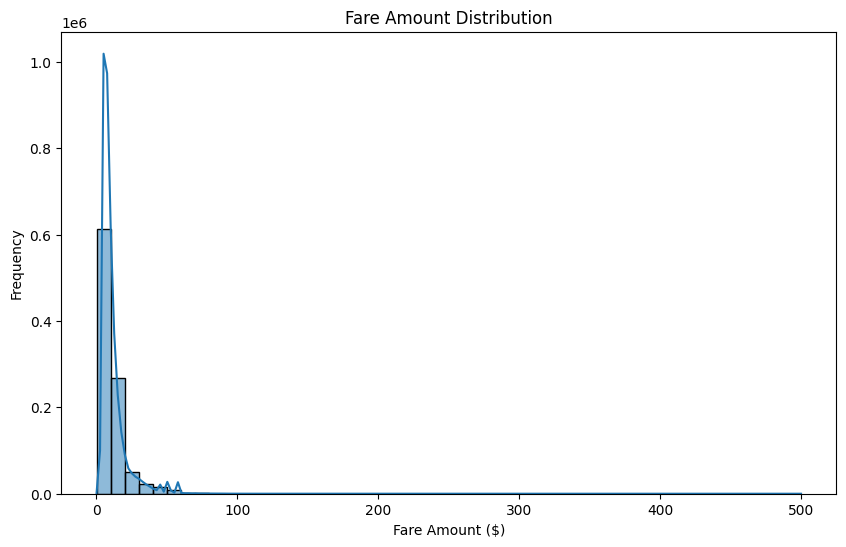

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['fare_amount'], bins=50, kde=True)
plt.title('Fare Amount Distribution')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')
plt.show()

In [6]:
import folium

# Sample for visualization
sample_df = df.sample(1000)

# Initialize the map
pickup_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Add points
for _, row in sample_df.iterrows():
    folium.CircleMarker([row['pickup_latitude'], row['pickup_longitude']], 
                        radius=1, color='blue').add_to(pickup_map)
pickup_map.save('pickup_locations.html')

/Users/mayaeidelman/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


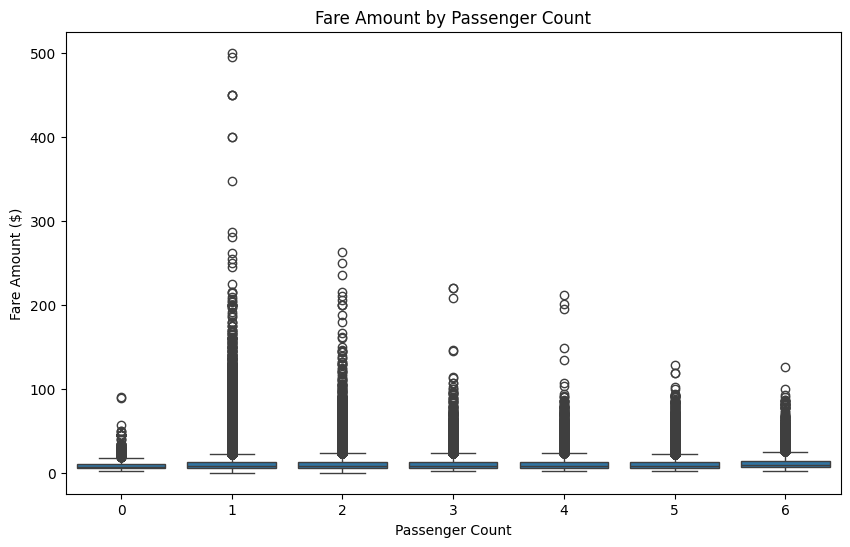

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='passenger_count', y='fare_amount', data=df)
plt.title('Fare Amount by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.show()

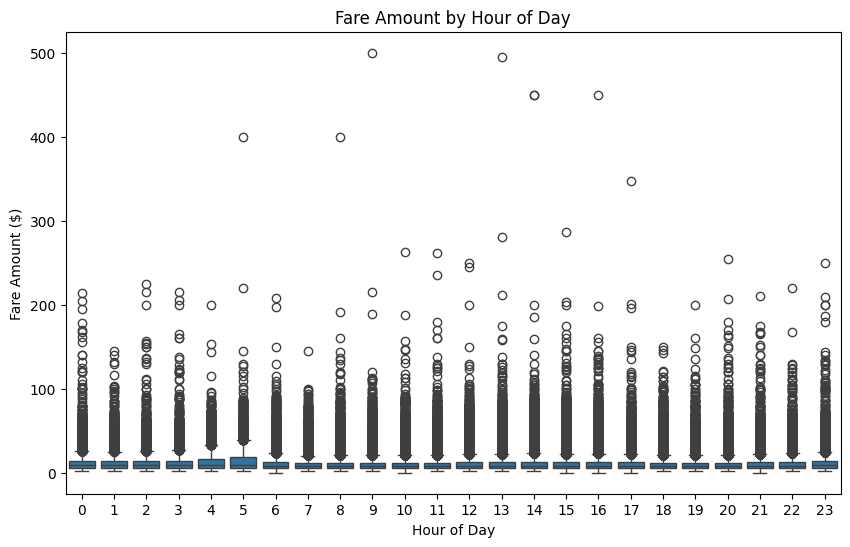

In [18]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour

plt.figure(figsize=(10, 6))
sns.boxplot(x='hour', y='fare_amount', data=df)
plt.title('Fare Amount by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fare Amount ($)')
plt.show()

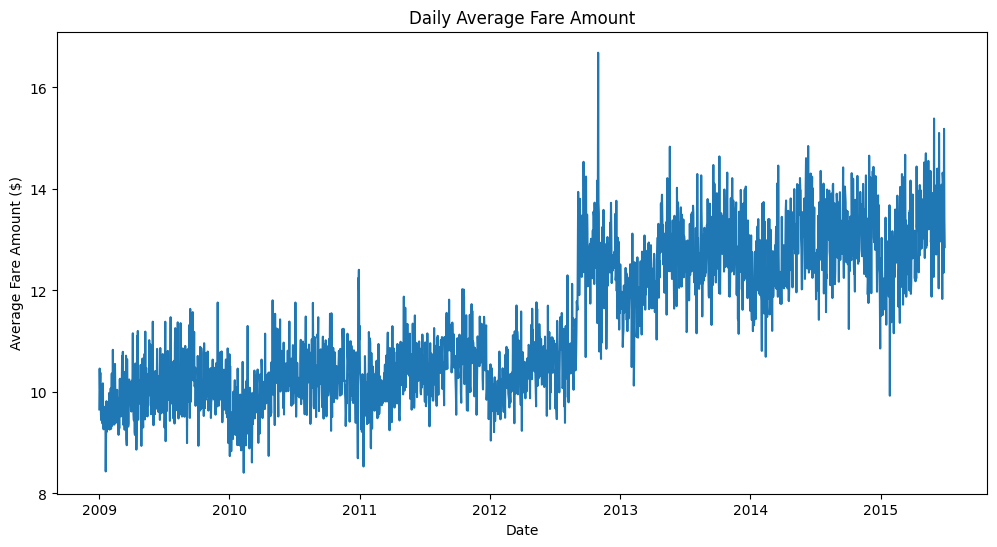

In [20]:
df['date'] = df['pickup_datetime'].dt.date
daily_fares = df.groupby('date')['fare_amount'].mean()

plt.figure(figsize=(12, 6))
daily_fares.plot()
plt.title('Daily Average Fare Amount')
plt.xlabel('Date')
plt.ylabel('Average Fare Amount ($)')
plt.show()

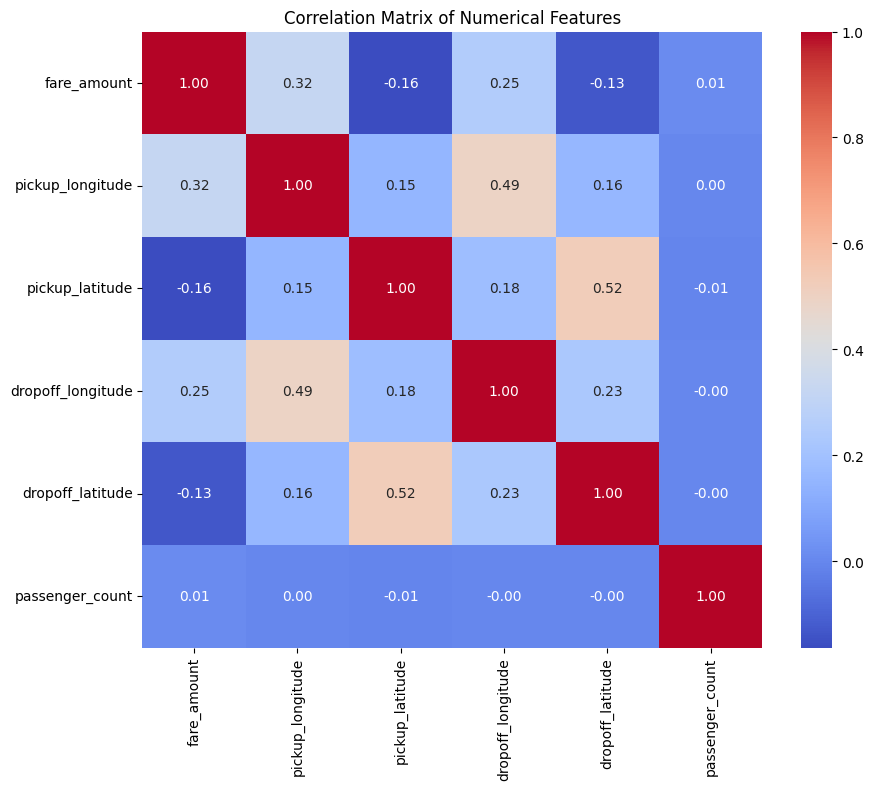

In [22]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Create new features

In [23]:
def manhattan_distance(lat1, lon1, lat2, lon2):
    return np.abs(lat1 - lat2) + np.abs(lon1 - lon2)

df['manhattan_distance'] = manhattan_distance(
    df['pickup_latitude'], df['pickup_longitude'],
    df['dropoff_latitude'], df['dropoff_longitude'])

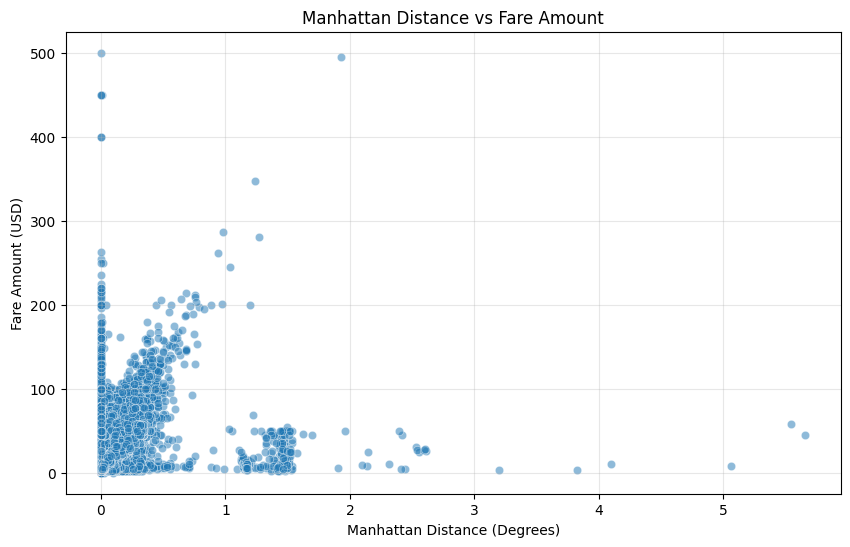

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='manhattan_distance', y='fare_amount', alpha=0.5)
plt.title('Manhattan Distance vs Fare Amount')
plt.xlabel('Manhattan Distance (Degrees)')
plt.ylabel('Fare Amount (USD)')
plt.grid(alpha=0.3)
plt.show()

In [28]:
from sklearn.cluster import KMeans

coords = df[['pickup_latitude', 'pickup_longitude']]
kmeans = KMeans(n_clusters=10, random_state=42).fit(coords)
df['pickup_cluster'] = kmeans.predict(coords)

coords = df[['dropoff_latitude', 'dropoff_longitude']]
kmeans = KMeans(n_clusters=10, random_state=42).fit(coords)
df['dropoff_cluster'] = kmeans.predict(coords)

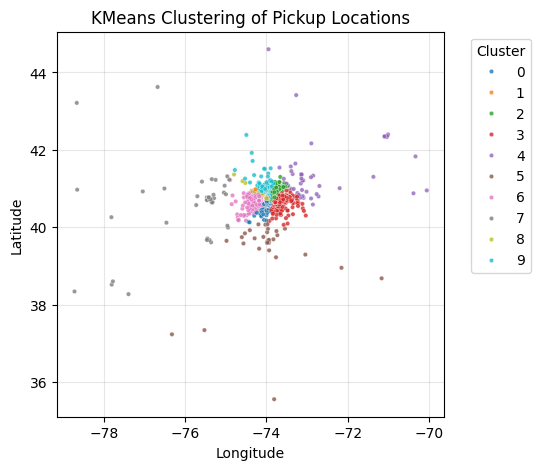

In [33]:
# Plot clusters on a scatter plot
plt.figure(figsize=(5, 5))
sns.scatterplot(
    x='dropoff_longitude', y='dropoff_latitude', hue='dropoff_cluster',
    palette='tab10', data=df, s=10, alpha=0.8
)
plt.title('KMeans Clustering of Pickup Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

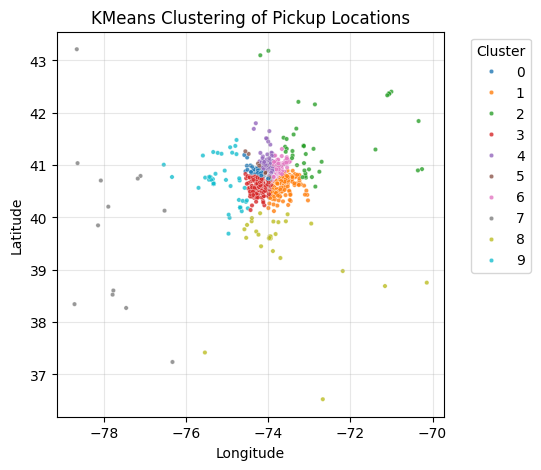

In [32]:
# Plot clusters on a scatter plot
plt.figure(figsize=(5, 5))
sns.scatterplot(
    x='pickup_longitude', y='pickup_latitude', hue='pickup_cluster',
    palette='tab10', data=df, s=10, alpha=0.8
)
plt.title('KMeans Clustering of Pickup Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

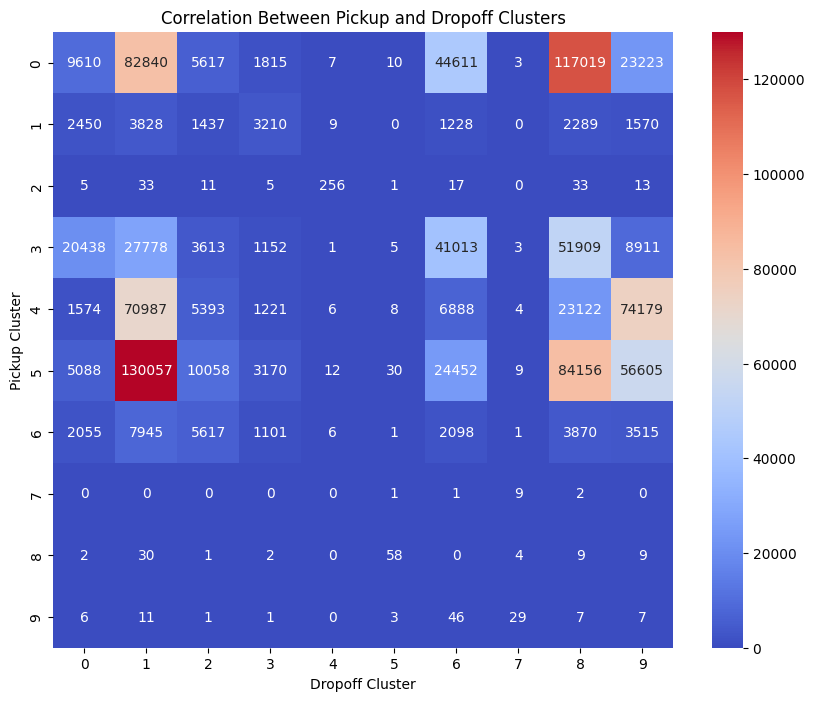

In [34]:
cluster_counts = df.groupby(['pickup_cluster', 'dropoff_cluster']).size().unstack(fill_value=0)

# Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cluster_counts, annot=True, fmt='d', cmap='coolwarm', cbar=True)
plt.title('Correlation Between Pickup and Dropoff Clusters')
plt.xlabel('Dropoff Cluster')
plt.ylabel('Pickup Cluster')
plt.show()

In [ ]:
coords = test[['pickup_latitude', 'pickup_longitude']]
kmeans = KMeans(n_clusters=10, random_state=42).fit(coords)
test['pickup_cluster'] = kmeans.predict(coords)

coords = test[['dropoff_latitude', 'dropoff_longitude']]
kmeans = KMeans(n_clusters=10, random_state=42).fit(coords)
test['dropoff_cluster'] = kmeans.predict(coords)

test['manhattan_distance'] = manhattan_distance(
    test['pickup_latitude'], test['pickup_longitude'],
    test['dropoff_latitude'], test['dropoff_longitude'])

test['date'] = test['pickup_datetime'].dt.date

# Train models

In [ ]:
features = ['manhattan_distance', 'pickup_cluster', 'dropoff_cluster', 'date_column']  # Include other columns as needed
target = 'fare_price'

X = df[features]
y = df[target]

# Decision Tree

# Random Forest

# Isolation Forest

# Adaboost

# Gradient Boosting

# XGBOOST

# lightGBM

# Catboost